In [2]:
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint,quad
import matplotlib.pyplot as plt

**Exercise 1**

1- Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.




In [5]:
a,b=1,1
S=0
while b<=4*(10**6):
    a,b=b,a+b
    #print(a)
    if a%2:
        S+=a
S

4613731

2- An irrational decimal fraction is created by concatenating the positive integers: 0.12345678910<font color='red'>1</font>112131415161718192021...

It can be seen that the 12th digit of the fractional part is <font color='red'>1</font>. If $d_n$ represents the nth digit of the fractional part, find the value of the following expression.

$$d_1 × d_{10} × d_{100} × d_{1000} × d_{10000} × d_{100000} × d_{1000000}$$

In [5]:
def digits(n):
    return [int(c) for c in str(n)]

def fractional_digits():
    n = 1
    while True:
        for i in digits(n):
            yield i
        n += 1

def search(targets):
    result = {}
    n = 0
    for d in fractional_digits():
        n += 1
        if n in targets:
            result[n] = d
            if len(result) == len(targets):
                return result

def solve():
    digit_at = search({1,10,100,1000,10000,100000,1000000})
    ans = 1
    for pos in digit_at:
        ans *= digit_at[pos]
    return ans
solve()

210

3- You are given the following information, but you may prefer to do some research for yourself.

- 1 Jan 1900 was a Monday.
- Thirty days has September, April, June and November.
- All the rest have thirty-one, Saving February alone, Which has twenty-eight, rain or shine. And on leap years, twenty-nine.
- A leap year occurs on any year evenly divisible by 4, but not on a century unless it is divisible by 400.

How many Sundays fell on the first of the month during the twentieth century (1 Jan 1901 to 31 Dec 2000)?

In [3]:
startyear = 1900                        
monthstart = 1
dayofmonth = 7#number of sundzy
count = 0
def LeapYear(y):
    d= (y%4==0 and y%100!=0)or(y%400==0)
    return d
def month_days(year, month):
    if month in [4, 6, 9, 11]:
        return 30
    if month == 2:
        if LeapYear(year)==True: 
            return 29
        else: 
            return 28
    return 31
while startyear <= 2000 and monthstart <= 12 and dayofmonth <= 31:
    dim = month_days(startyear, monthstart)           #dim=date in the month                    
    if dayofmonth == 1 and startyear > 1900: 
        count+= 1
    dayofmonth += 7
    if dayofmonth > dim:
        dayofmonth-= dim
        monthstart += 1
        if monthstart == 13:
            monthstart = 1
            startyear += 1
print(count)

171


**Exercise 2**

1- Write a function that takes one argument: A string ``s`` and returns another string ``t``. The string ``t`` should be constructed from ``s`` such that:
* All **upper** case letters from ``s`` are changed into **lower** case.
* All **lower** case letters from ``s`` are changed into **upper** case.
* All characters from ``s`` that are not letters are **deleted**.

In [6]:
def Change(S):
    s=""
    for i in S:
        if i.isupper():
            s+=i.lower()
        elif i.islower():
            s+=i.upper()
    return s
Change("desMon,      D")

'DESmONd'

2- Write a function, named **UpLow**, that takes one argument: string ``s`` and **returns** a list with two elements. The first element should be the number of **lowercase letters** in ``s``. The second element should be the number of **uppercase letters** in ``s``.

In [8]:
def UpLow(stri):
    N=0
    n=0
    for i in stri:
        if i.isupper():
            N+=1
        elif i.islower():
            n+=1
    return [n,N]
UpLow("Val;      ePa ")

[4, 2]

3- Write a function that takes one argument: string ``s``  and returns either ``True`` or ``False``. It should return ``True`` if and only if **the string is a name**. We assume that a string is a name if:
* It starts with an uppercase letter.
* All the other characters are lowercase letters.

In [15]:
def Name(Str):
    if Str[0].isupper() and all([Str[i].islower() for i in range(1,len(Str))]):
            return True
    return False
Name("Valer   ;  a")

False

In [ ]:
def Name(Str):
    if Str[0].isupper() and all([Str[i].islower() for i in range(1,len(Str))]):
            return True
    return False
Name("Valera")

4- Write a function that takes one argument: list of strings ``L``. The function should return an integer: **The first index where the list element contains a name**. If there are no names on the list please return ``-1``

In [16]:
def Content(L):
    for i in range(len(L)):
        if Name(L[i]):
            return i
    return -1
print(Content(["val    era","1","hello","4"]))
Content(["alera","1","He1lo","4"])

-1


-1

**Exercise 3**

1- Write a function that takes one argument: List of integers ``L`` and returns the **maximum element in ``L`` which is strictly negative**. If such an element does not exist, **return ``0``**.

In [21]:
import numpy as np
def MaxNeg(L):
    M=np.array(L)
    l=M[M<0]
    if len(l)!=0:
        return np.max(l)
    return 0
print(MaxNeg(np.array([1,-2,4,1,0,-12,9])))
MaxNeg(([1,2,4,1,0,12,9]))

-2


0

2- Write a function that takes one argument: A 2D array ``M`` and:
* For each **row** computes the maximum negative element.
* Returns the **sum of those elements**.

Please use the function from Problem 3 in your solution.

In [22]:
def MaxSum(M):
    s=0
    for i in range(M.shape[0]+1):
        s=s+MaxNeg(M[i:i+1])
    return s
MaxSum(np.array([[-2,3,4,-5,5],
                 [3,-4,5,-65,56],
                 [2,3,-4,-5,3],
                 [4,-5,44,-5,53],
                 [-3,4,4,-53,45]]))

-18

3- Write a function that takes one argument: A matrix of integers ``M`` and:
* For each **column** computes the maximum negative element.
* Returns the **sum of those elements**.


In [23]:
def MaxSumCol(M):
    s=0
    for i in range(M.shape[0]+1):
        s=s+MaxNeg(M[:,i:i+1])
    return s
MaxSumCol(np.array([[-2,3,4,-5,5],
                    [3,-4,5,-65,56],
                    [2,3,-4,-5,3],
                    [4,-5,44,-5,53],
                    [-3,4,4,-53,45]]))

-15

**Exercise 4**

1- Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$

In [57]:
from scipy.integrate import quad
a=0
b=2
f=lambda x:(x**3+5*x-20)/(x**2+3)
A=quad(f,a,b)
print(A[0])
c=3
d=5
g=lambda x: (x-1/3)*(np.sqrt(x**4-3))
B=quad(g,c,d)
print(B[0])

-7.049316535735796
124.40877284192784


2- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,H, f$ as inputs and return Z. Here, ``H = 0.001`` is the default value.

In [26]:
#from scipy.integrate import quad
def Trap(a,b,f,H=0.001):
    som=0
    N=int((b-a)/H +1)
    x=np.linspace(a,b,N)
    for i in range(1,N):
        eva=H*((f(x[i-1])+f(x[i]))/2)
        som=som+eva
    return som

3- Compute the integrales A and B using your function **Trap**

In [27]:
print(Trap(0,2,f=lambda x:(x**3+5*x-20)/(x**2+3)))
print(Trap(3,5,f=lambda x: (x-1/3)*(np.sqrt(x**4-3))))

-7.049316458638298
124.40877672379841


###### **Exercise 5**
Write a python code to solve the following system of equations
1. \begin{equation}
\begin{cases}
    x^2 + y + x = 4\\
    2e^x + 3y = 14
\end{cases}
\end{equation}

In [59]:
import numpy as np
from scipy.optimize import fsolve
def funct(u):
    x=u[0]
    y=u[1]
    
    f=np.empty((2))
    f[0]=x**2+y+x-4
    f[1]=2*np.exp(x)+3*y-14
    return f
uGuess=np.array([0,0])
u=fsolve(funct,uGuess)
print("x=",u[0],"y=",u[1])

x= 5.13108676346246e-16 y= 3.999999999999999


###### 2. 

\begin{equation}
  \begin{cases}
    x - 2y -z +6t= 4\\
    2x + 2y -z - 7t = -4\\
    -x - y +2z + 5t = 5\\
    -3x +4y +2z + 5t = 8\\
  \end{cases}.
\end{equation}

In [60]:
A=np.array([[1,-2,-1,6],[2,2,-1,-7],[-1,-1,2,5],[-3,4,2,5]])
b=np.array([[4],[-4],[5],[8]])
A1=np.linalg.inv(A)
u=A1@b
print("x=",u[0,0],"y=",u[1,0],"z=",u[2,0],"t=",u[3,0])

x= 1.0000000000000004 y= 1.0000000000000002 z= 1.0 t= 1.0


**Exercise 6**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    y' = f(x,y),      & \quad \text{on } [a, b]\\&\qquad\qquad\qquad (1)\\
    y(a) = c,
  \end{cases}
\end{equation}
Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.
1. Write a python function <b> EulerMethod </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using Euler method i.e.
$$ y_{k+1} = y_k + Hf(x_k,y_k) $$


In [63]:
def EulerMethod(a,b,c,N,f):
    H=(b-a)/N
    x=np.zeros(N)
    y=np.zeros(N)
    x[0]=a
    y[0]=c
    #x=np.linspace(a,b,N)
    for k in range(N-1):
        x[k+1]=x[k]+H
        y[k+1]=y[k]+H*f(x[k],y[k])
    return (x,y)
    

2. Write a python function <b> RK2Method </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using second order Runge-Kutta  method i.e.
\begin{equation}
\begin{cases}
\alpha = f(x_k,y_k)\\\\
y_{k+1} = y_k + Hf(x_k+\dfrac{H}{2}, y_k + \dfrac{H}{2}\alpha)
\end{cases}
\end{equation}

In [64]:
def RK2Method(a,b,c,N,f):
    H=(b-a)/N
    x=np.zeros(N)
    y=np.zeros(N)
    x[0]=a
    y[0]=c
    #x=np.linspace(a,b,N)
    
    for k in range(N-1):
        k1=f(x[k],y[k])
        y[k+1]=y[k]+H*f(x[k]+H/2,y[k]+k1*H/2)
        x[k+1]=x[k]+H
    return (x,y)
    

3. Let us consider the initial value problem 

\begin{equation}
  \begin{cases}
    y' = 2y + e^{2x},      & \quad \text{on } [0, 1]\\\\
    y(0) = 3,
  \end{cases}
\end{equation}
with exact solution $g(x) = (x+3)e^{2x}$. 

For $N=200$, use subplot to plot side by side
- the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>
- the absolute error between the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>

In [1]:
def model(y,x):
    dydx=2*y+np.exp(2*x)
    return dydx
ya=3
a=0
b=1
N=200
x=np.linspace(a,b,N)
y=odeint(model,ya,x)
Z=EulerMethod(0,1,3,200, f=lambda x,y:2*y +np.exp(2*x))
m=RK2Method(0,1,3,200, f=lambda x,y:2*y +np.exp(2*x))
g=lambda x:(x+3)*np.exp(2*x)
erro1=abs(g(x)-Z[1])
erro2=abs(g(x)-y[1])
erro3=abs(g(x)-m[1])

plt.subplot(2,2,1)
plt.plot(x,g(x))
plt.title("Exact solution")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.subplot(2,2,2)
plt.plot(Z[0],Z[1])
plt.title("Euler ")
plt.xlabel("x")
plt.ylabel("yEul")
plt.grid()
plt.subplot(2,2,3)
plt.plot(m[0],m[1])
plt.title("rk2")
plt.xlabel("x")
plt.ylabel("yEul")
plt.grid()
plt.subplot(2,2,4)
plt.plot(x,y)
plt.title("odeint")
plt.xlabel("x")
plt.ylabel("yEul")
plt.grid()
plt.show()


# plt.subplot(3,1,1)
# plt.plot(x,erro1)
# plt.title("Exact")
# plt.xlabel("x")
# plt.ylabel("yEul")
# plt.grid()



# plt.subplot(3,1,2)
# plt.plot(x,erro2)
# plt.title("Error EulerMethod")
# plt.xlabel("x")
# plt.ylabel("yEul")
# plt.grid()


# plt.subplot(3,1,3)
# plt.plot(x,erro3)
# plt.title("Error EulerMethod")
# plt.xlabel("x")
# plt.ylabel("ErrEul")
# plt.grid()
# plt.show()


NameError: name 'np' is not defined

4. Which of the numerical methods used is more efficient? Why?

array([3.00000000e+00, 0.00000000e+00, 5.05050462e-03, 1.02025291e-02,
       1.54576038e-02, 2.08172799e-02, 2.62831290e-02, 3.18567440e-02,
       3.75397390e-02, 4.33337496e-02, 4.92404334e-02, 5.52614698e-02,
       6.13985609e-02, 6.76534313e-02, 7.40278285e-02, 8.05235234e-02,
       8.71423103e-02, 9.38860073e-02, 1.00756457e-01, 1.07755525e-01,
       1.14885104e-01, 1.22147109e-01, 1.29543484e-01, 1.37076194e-01,
       1.44747233e-01, 1.52558622e-01, 1.60512406e-01, 1.68610658e-01,
       1.76855480e-01, 1.85248999e-01, 1.93793371e-01, 2.02490781e-01,
       2.11343442e-01, 2.20353597e-01, 2.29523516e-01, 2.38855502e-01,
       2.48351885e-01, 2.58015027e-01, 2.67847322e-01, 2.77851193e-01,
       2.88029096e-01, 2.98383519e-01, 3.08916981e-01, 3.19632037e-01,
       3.30531271e-01, 3.41617305e-01, 3.52892791e-01, 3.64360418e-01,
       3.76022910e-01, 3.87883025e-01, 3.99943557e-01, 4.12207338e-01,
       4.24677234e-01, 4.37356149e-01, 4.50247027e-01, 4.63352845e-01,
      

##### **Exercise 7**

Consider heat conduction in a rod with constant heat conduction properties, $\lambda^2$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -\lambda^2\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{\lambda^2}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,\alpha, \lambda, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [12]:
def MatGenerator(a,b,alpha,lambd,beta,N,g):
    x=np.linspace(a,b,N+1)
    h=(b-a)/N
    A1=((lambd**2)/(h**2))*(-np.eye(N-1,N+1,0)+2*np.eye(N-1,N+1,1)-np.eye(N-1,N+1,2))
    u0=np.zeros((N+1))
    u0[0]=1
    v0=np.zeros((N+1))
    v0[N]=1
    A=np.vstack((u0,A1,v0))
    b=np.hstack((alpha,np.array([g(x[i]) for i in range(1,N)]),beta))
    return b, A

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, \lambda=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x, $$

and plot the numerical solution

Text(0, 0.5, 'y')

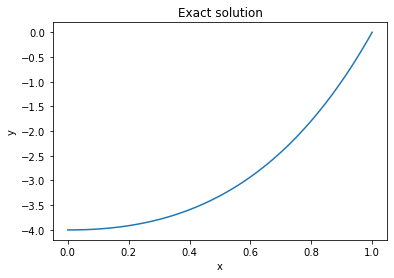

In [17]:
b,A=MatGenerator(0,1,-4,1,0,100, g=lambda x: -4*(1+x)*np.exp(x))
U=np.linalg.solve(A,b)

x=np.linspace(0,1,101)
plt.plot(x,U)
plt.title("Exact solution")
plt.xlabel("x")
plt.ylabel("y")

In [74]:
y.shape

(99, 99)

**Exercise 14**

Create a Module that contains all the functions on this notebook. Then, import the module to test its functions (one function per cell) 

Note: if your group number is **5** then your module should be named **AllFunctionGroup5.py**

In [67]:
import AllFunctionGroup4 as AlfG4
